# Machine Learning

![ML MAp](https://scikit-learn.org/1.3/_static/ml_map.png)

# Machine Learning - Regresión 

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

## Regresión lineal sencilla

Con un modelo de regresión lineal simple, existe una relación entre una única variable de entrada y una única variable de salida separada. El modelo de aprendizaje automático tratará de averiguar cómo están relacionadas ambas variables.

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
plt.scatter(x=df["YearsExperience"], y=df["Salary"])
plt.ylabel("Salary")
plt.xlabel("Years of experience")
plt.show()

Divideremos las columnas del dataframe para poder hacer un **aprendizaje supervisado**.

El aprendizaje supervisado, también conocido como aprendizaje automático supervisado, es una subcategoría del aprendizaje automático y la inteligencia artificial. Se define por su uso de conjuntos de datos etiquetados para entrenar algoritmos que clasifiquen datos o predigan resultados con precisión.

Donde:

$X$ = Years of Experience

$y$ = Salary

Es decir,se busca trazar una línea de mejor ajuste, la cual se calcula a través del método de mínimos cuadrados. Sin embargo, a diferencia de otros modelos de regresión, esta línea es recta cuando se traza en un gráfico.

### Preprocesado

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
y

Dado que los datos se encuentran en diferentes rangos, se recomienda **escalar los datos**.

¿Qué es el escalamiento de los datos?

De forma sencilla podemos decir que el escalamiento consiste en hacer que cada variable (columna) de nuestro set de datos tenga aproximadamente el mismo rango de valores.

Se podria utilizar MixMaxScaler que convierte los valores a una escala $[0, 1]$

$
\begin{align}
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
\end{align}
$

Pero para proyectos de Machine Learning, se recomienda escalar las variables con una *desviación estándar de 1 y media de 0* para eso esta *z-score*

$
\begin{align}
z = \frac{X - \mu}{\sigma}
\end{align}
$

In [8]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()


X_scaler.fit(X)
y_scaler.fit(
    y.reshape(-1, 1)
)  # Indica que queremos una columna (1) y todas las filas necesarias (-1 es un comodin para que numpy lo calcule automaticament)

X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y.reshape(-1, 1))

In [ ]:
X_scaled

In [ ]:
y_scaled

In [ ]:
plt.scatter(x=X_scaled, y=y_scaled.reshape(-1, 1), color="blue")
plt.ylabel("Salary")
plt.xlabel("Years of experience")
plt.show()

Para realizar modelos de Machine Learning, se recomienda dividir el dataset en **train_set** y **test_set** siendo el primero, el conjunto de datos con el cual entrenaremos el modelo y el segundo, con el que haremos el test del modelo.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=0
)

In [ ]:
plt.scatter(x=X_train, y=y_train, color="blue")
plt.scatter(x=X_test, y=y_test, color="red")
plt.ylabel("Salary (scaled)")
plt.xlabel("Years of experience (scaled)")
plt.legend(["train", "test"])
plt.show()

### Entrenamiento del modelo de regresión lineal

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Realizamos la transofrmación inversa con `X_scaler` e `y_scaler` para volver los datos a la magnitud original

In [16]:
X_train_inv_scaled = X_scaler.inverse_transform(X_train)
y_train_inv_scaled = y_scaler.inverse_transform(y_train)

Misma idea con las predicciones realizadas con el modelo entrenado, predecimos con el método `predict()` y después invertimos la transformacion

In [ ]:
y_pred = regressor.predict(X_train)
y_pred_inv_scaled = y_scaler.inverse_transform(y_pred)
y_pred_inv_scaled

In [ ]:
plt.scatter(X_train_inv_scaled, y_train_inv_scaled, color="red")
plt.plot(
    X_train_inv_scaled,
    y_pred_inv_scaled,
    color="blue",
)
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
# Es la ordenada al origen, es decir, el valor de y cuando todas las características tienen valor 0.
regressor.intercept_

In [ ]:
# Mostrar el coeficiente del modelo
regressor.coef_

### Evaluación

#### Coeficiente de determinación $R^2$

Examina cómo las diferencias en una variable pueden ser explicadas por la diferencia en una segunda variable, al predecir el resultado de un evento determinado.

In [ ]:
regressor.score(X_train, y_train)  # R cuadrado

#### RMSE (Root mean squared error, raiz de error cuadrático medio)

Mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima.

$
\begin{align}
RMSE = \sqrt{ \frac{1}{n}\sum^n_{i=1}{(Y_i - \hat{Y_i})^2}}
\end{align}
$

In [ ]:
rmse = root_mean_squared_error(y_train_inv_scaled, y_pred_inv_scaled)
rmse

### Predicción con el modelo entrenado

In [219]:
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(x=X_train, y=y_train, color="blue")
plt.scatter(x=X_test, y=y_test, color="red")
plt.scatter(x=X_test, y=y_pred, color="green")
plt.ylabel("Salary (scaled)")
plt.xlabel("Years of experience (scaled)")
plt.legend(["train", "test", "predictions"])
plt.show()

Para predecir un valor nuevo, como por ejemplo, 15 años de experiencia, debemos escalar el dato antes de poder entregarselo al modelo

In [ ]:
new_data = np.array(15).reshape((-1, 1))
new_data

In [ ]:
new_data_scaled = X_scaler.transform(new_data)
new_data_scaled

In [ ]:
new_y_pred_scaled = regressor.predict(new_data_scaled)
new_y_pred_scaled

In [ ]:
new_y_pred = y_scaler.inverse_transform(new_y_pred_scaled)
new_y_pred

In [ ]:
plt.scatter(x=X, y=y, color="blue")
plt.scatter(x=new_data, y=new_y_pred, color="green")
plt.ylabel("Salary")
plt.xlabel("Years of experience")
plt.legend(["Original", "predicted"])
plt.show()

### Guardado y carga estandarizadores y modelo

Utilizaremos la libreria `joblib` para guardar los estandarizadores y modelo generados con `scikit-learn`

In [226]:
from joblib import dump, load

In [ ]:
dump(regressor, "linear_regressor.joblib")
dump(X_scaler, "x_scaler.joblib")
dump(y_scaler, "y_scaler.joblib")

In [228]:
# Para cargar los estandarizadores y modelo guardado, utilizaremos el metodo load
linear_regressor = load("linear_regressor.joblib")
X_scaler = load("x_scaler.joblib")
y_scaler = load("y_scaler.joblib")

In [ ]:
new_data = np.array(18).reshape((-1, 1))
new_data

In [ ]:
new_data_scaled = X_scaler.transform(new_data)
new_data_scaled

In [ ]:
new_y_pred_scaled = linear_regressor.predict(new_data_scaled)
new_y_pred_scaled

In [ ]:
new_y_pred = y_scaler.inverse_transform(new_y_pred_scaled)
new_y_pred

## Regresion Lineal Múltiple

La regresión lineal múltiple es una extensión de la regresión lineal simple. Se utiliza cuando queremos predecir el valor de una variable medida en una escala continua, de razones o intervalos, en función del valor de otras dos o más variables

### Data

In [ ]:
rlm_data = pd.read_csv("50_Startups.csv")
rlm_data.head()

In [ ]:
rlm_data.info()

### Preprocesado

In [235]:
X = rlm_data.iloc[:, :-1]
y = rlm_data.iloc[:, 4].values

In [ ]:
X.head()

In [ ]:
y[0]

In [238]:
ct_x = make_column_transformer(
    (
        StandardScaler(),
        [
            "Administration",
            "Marketing Spend",
        ],
    ),
    (OneHotEncoder(handle_unknown="ignore"), ["State"]),
)

ct_y = StandardScaler()

In [ ]:
X_scaled = ct_x.fit_transform(X)
y_scaled = ct_y.fit_transform(y.reshape(-1, 1))
X_scaled[0]

In [ ]:
X_scaled.shape

In [ ]:
rlm_data["State"].unique()

In [ ]:
y_scaled[:5]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=0
)

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

In [245]:
y_pred = regression.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred_unscaled = ct_y.inverse_transform(y_pred)
y_pred_unscaled

In [ ]:
regression.score(X_train, y_train)

## Support Vector Machine (SVM)

Lo que se pretende con el SVM en regresión es buscar el hiperplano que mejor se ajuste a los datos y permita una tolerancia a los errores. En otras palabras, es una regresión lineal con restricciones.

![SVM](https://keepcoding.io/wp-content/uploads/2022/12/image-239.png)

In [249]:
svm_dataset = pd.read_csv("Position_Salaries.csv")

In [250]:
X = svm_dataset.iloc[:, 1:2].values
y = svm_dataset.iloc[:, 2].values

In [251]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

In [ ]:
regression = SVR(kernel="rbf")  #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
regression.fit(X, y)

In [ ]:
X[0]

In [ ]:
new_data = np.array([[6.5]])
new_data

 Scikit learn espera una una matriz **bidimensional**.

 Aunque tengas un solo dato, el modelo siempre espera recibirlo en una estructura consistente, que tenga la forma `(n_samples, n_features)`:

* `n_samples`: Número de muestras (filas)
* `n_features`: Número de características o variables por muestra (columnas)

Diferencias entre las distintas formas del array

* `np.array(6.5)`:
        Esto es un escalar. Su forma es (), no tiene dimensiones explícitas.
        No es adecuado para modelos que esperan matrices o vectores como entrada.

* `np.array([6.5])`:
        Esto es un vector unidimensional o arreglo de una dimensión con forma (1,).
        Aunque contiene un único valor, scikit-learn espera una matriz bidimensional.

* `np.array([[6.5]])`:
        Esta es una matriz bidimensional con una fila y una columna.
        Su forma es (1, 1), que es la que scikit-learn requiere para datos de entrada con una muestra y una característica.

In [255]:
y_pred = regression.predict(sc_X.transform(new_data))

In [ ]:
y_pred

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color="red")
plt.plot(X_grid, regression.predict(X_grid), color="blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [ ]:
regression.score(X, y)

## Regresión con Árboles de decisión

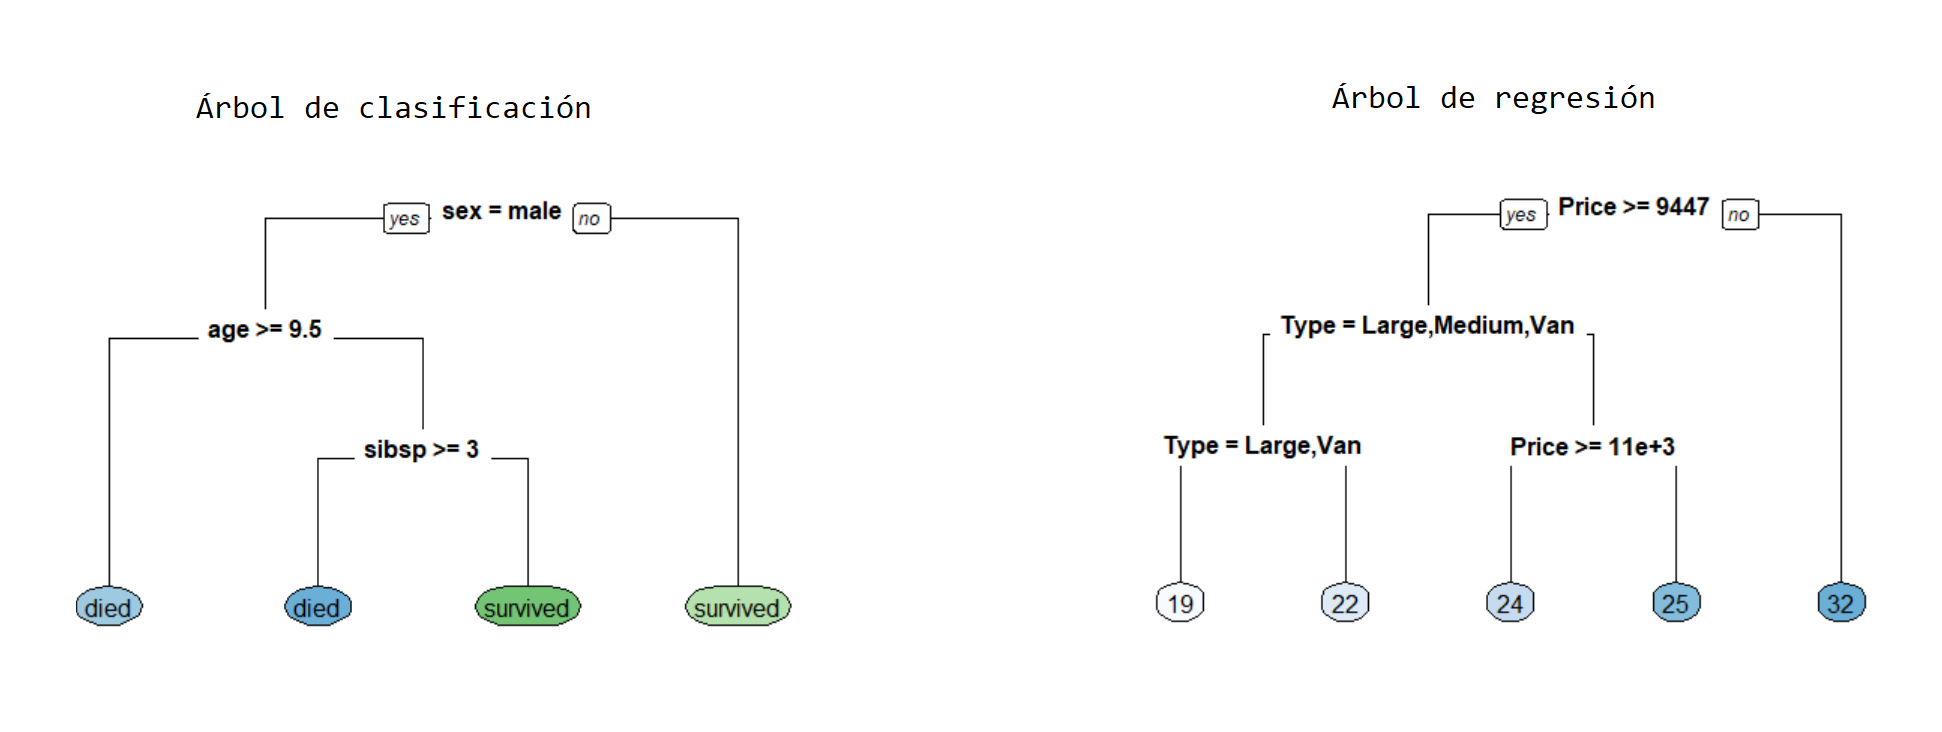

In [259]:
tree_dataset = pd.read_csv("Position_Salaries.csv")

In [260]:
X = tree_dataset.iloc[:, 1:2].values
y = tree_dataset.iloc[:, 2].values

In [ ]:
regression = DecisionTreeRegressor(random_state=0)
regression.fit(X, y)

In [ ]:
y_pred = regression.predict([[6.5]])
print(y_pred)

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color="red")
plt.plot(X, regression.predict(X), color="blue")
plt.title("Modelo de Regresión")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

## Random Forest Regressor

In [ ]:
regression = RandomForestRegressor(n_estimators = 300, random_state = 0)
regression.fit(X, y)

In [ ]:
regression = RandomForestRegressor(n_estimators=500, random_state=0)
regression.fit(X, y)

In [266]:
y_pred = regression.predict([[6.5]])

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color="red")
plt.plot(X_grid, regression.predict(X_grid), color="blue")
plt.title("Modelo de Regresión con Random Forest")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()